# Challenge - Wine Exploration 🍷

**Titre du Projet** : Analyse des Critiques de Vins

**Description du Proje**t : Notre projet consiste à explorer en profondeur l'ensemble de données Wine Reviews, qui comprend 130 000 critiques de vins. Ces critiques sont accompagnées d'informations sur la variété du vin, l'emplacement, le domaine viticole, le prix et une description détaillée. L'ensemble de données a été extrait de Wine Enthusiast.

**Objectif** : L'objectif de notre analyse est de tirer des insights et des tendances à partir de ces critiques de vins, en mettant l'accent sur la variété, l'emplacement, le prix, et en examinant la relation entre les notes attribuées aux vins et d'autres facteurs.

# **1. Analyse descriptive :**


**1.1. Chargement des données**





Je vais d'abord charger le fichier CSV et afficher un aperçu des premières lignes du DataFrame pour avoir une idée de sa structure. Ensuite, je fournirai un résumé descriptif pour comprendre la nature des données. Cela comprendra les types de données, le nombre d'entrées, les valeurs manquantes, etc.

In [1]:
# TODO : write you own EDA
import pandas as pd
from google.colab import files
file = files.upload()

Saving winemag-data-130k-v2.csv to winemag-data-130k-v2.csv


In [43]:
import pandas as pd
df = pd.read_csv("winemag-data-130k-v2.csv")

In [44]:
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [90]:
#df.tail

In [47]:
df.shape

(129971, 14)

L'ensemble de données sur les critiques de vins contient 129 971 entrées et 14 colonnes.


In [48]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [49]:
df.index

RangeIndex(start=0, stop=129971, step=1)

Types de données et informations clés:

In [50]:
type(df)

pandas.core.frame.DataFrame

In [51]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


Les colonnes comprennent le pays, la description du vin, la désignation, les points (notation), le prix, la province, les régions, le nom du dégustateur, leur compte Twitter, le titre, la variété du vin et le domaine.
Types de données : majoritairement des objets (chaînes), avec quelques colonnes numériques (points, price).
Des valeurs manquantes sont présentes dans plusieurs colonnes, notamment country, designation, price, province, region_1, region_2, taster_name, taster_twitter_handle, et variety.





In [52]:
data_description = df.describe(include='all')


In [64]:
data_description

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,NaN,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
print(df[['price', 'points']].describe())

               price         points
count  120975.000000  129971.000000
mean       35.363389      88.447138
std        41.022218       3.039730
min         4.000000      80.000000
25%        17.000000      86.000000
50%        25.000000      88.000000
75%        42.000000      91.000000
max      3300.000000     100.000000


**Statistiques descriptives :**

Les notes (points) varient de 80 à 100.
Les prix varient considérablement, allant de très abordables à des vins extrêmement chers (prix maximum de 3300 $).



<Figure size 640x480 with 0 Axes>

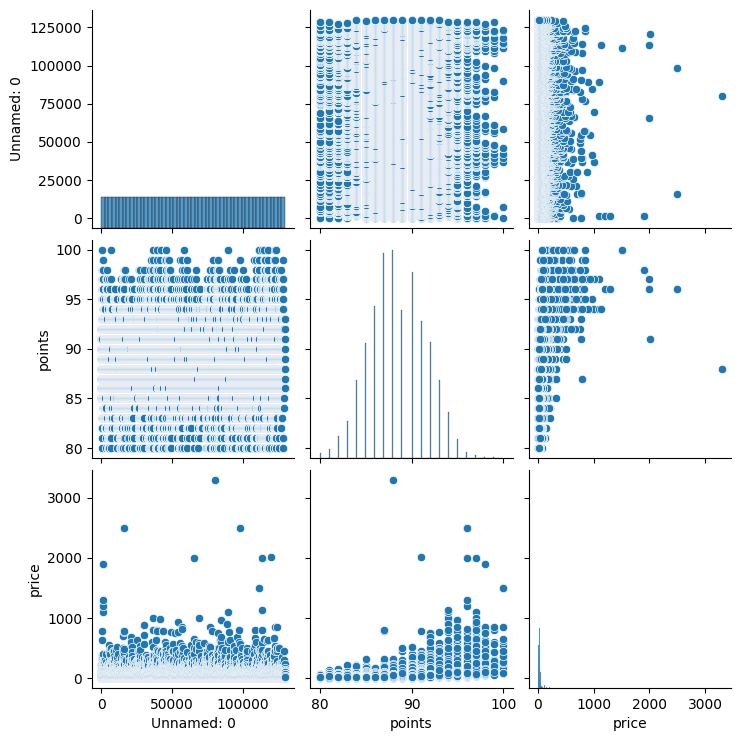

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

sns.pairplot(df)

plt.show()

In [55]:
# Find missing data
df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [63]:
print(df.columns)

Index(['Unnamed: 0', 'country', 'description', 'points', 'price', 'province',
       'region_2', 'title', 'variety', 'winery'],
      dtype='object')


## **2 Nettoyage des données :**


a/ Traitement des valeurs manquantes :
 Nous examinerons les colonnes avec des valeurs manquantes et déciderons de les remplir ou de supprimer les lignes/colonnes concernées.

In [98]:

#colonnes_a_supprimer = ['designation', 'region_1' , 'region_2' , 'taster_name', 'taster_twitter_handle']

# Suppression des colonnes spécifiées
#df.drop(columns=colonnes_a_supprimer, inplace=True)





data_cleaned = df




In [99]:
data_cleaned

,Unnamed: 0,country,description,points,price,province,region_2,title,variety,winery,description_length
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.368796,Sicily & Sardinia,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,172
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,227
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,186
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,199
4,4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,249
...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.000000,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),227
129967,129967,US,Citation is given as much as a decade of bottl...,90,75.000000,Oregon,Oregon Other,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,233
129968,129968,France,Well-drained gravel soil gives this wine its c...,90,30.000000,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,225
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.000000,Alsace,NaN,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,216


b/ Suppression des lignes avec des valeurs manquantes :

In [71]:
# Suppression des lignes avec des valeurs manquantes dans 'province' et 'variety'
data_cleaned.dropna(subset=['province', 'variety'], inplace=True)


print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129907 entries, 0 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   129907 non-null  int64  
 1   country      129907 non-null  object 
 2   description  129907 non-null  object 
 3   points       129907 non-null  int64  
 4   price        120915 non-null  float64
 5   province     129907 non-null  object 
 6   region_2     50511 non-null   object 
 7   title        129907 non-null  object 
 8   variety      129907 non-null  object 
 9   winery       129907 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 10.9+ MB
None


c/ Traitement des valeurs manquantes :

8996 dans Price qui devrait être une fonctionnalité importante, nous remplacerons les valeurs vides par les mean()valeurs existantes

In [73]:
# Cleaning price - replacing by mean value
data_cleaned["price"] = data_cleaned["price"].fillna(data_cleaned["price"].mean())
data_cleaned

,Unnamed: 0,country,description,points,price,province,region_2,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.368796,Sicily & Sardinia,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.000000,Mosel,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,90,75.000000,Oregon,Oregon Other,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,90,30.000000,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.000000,Alsace,NaN,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


d/ Supprimer les lignes en double

In [74]:
# Find duplicated lines
data_cleaned.duplicated().sum() # Returns 0 => there are no duplicated lines in the dataset

0

# **3**. Analyse univariée:

3.1 Distribution des notes :

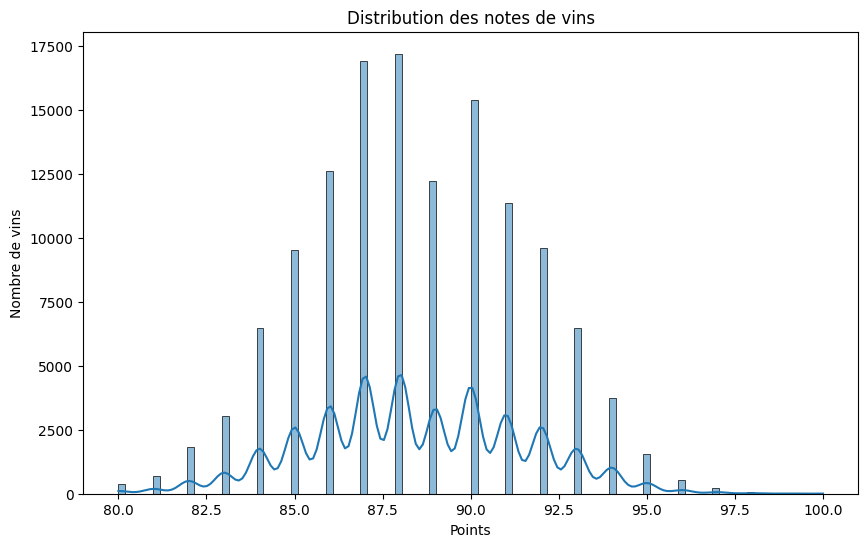

In [75]:

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['points'], kde=True)
plt.title('Distribution des notes de vins')
plt.xlabel('Points')
plt.ylabel('Nombre de vins')
plt.show()

-La distribution semble être normale, centrée autour de la moyenne, qui est de 88.
- Les notes varient principalement dans un intervalle relativement restreint, indiquant une certaine cohérence dans l'évaluation des vins.
-Le pic le plus élevé se situe autour de 88, ce qui correspond à notre valeur moyenne prédéfinie.
-La courbe de densité  confirme la forme approximativement normale de la distribution.

3.2 Analyse par pays :

In [91]:

country_group = data_cleaned.groupby('country').agg({'points':'mean', 'price':'mean'}).reset_index()
country_group

,country,points,price
0,Argentina,86.710263,24.635849
1,Armenia,87.500000,14.500000
2,Australia,88.580507,35.436629
3,Austria,90.101345,31.514608
4,Bosnia and Herzegovina,86.500000,12.500000
5,Brazil,84.673077,24.881615
6,Bulgaria,87.936170,14.645390
7,Canada,89.369650,35.708585
8,Chile,86.493178,20.969951
9,China,89.000000,18.000000


In [97]:
sorted_by_price_descending = country_group.sort_values(by='price', ascending=False)
sorted_by_price_descending

,country,points,price
38,Switzerland,88.571429,85.285714
14,England,91.581081,50.578973
17,Germany,89.851732,42.114363
19,Hungary,89.191781,40.612115
15,France,88.845109,40.011592
22,Italy,88.562231,39.086564
40,US,88.563720,36.568181
7,Canada,89.369650,35.708585
2,Australia,88.580507,35.436629
13,Egypt,84.000000,35.368796


- Suisse (88.57 points, 85.29 prix moyen) :

Les vins suisses, bien que notés raisonnablement, sont en moyenne les plus chers.
- Angleterre (91.58 points, 50.58 prix moyen) :

Les vins anglais ont une note moyenne élevée et un prix moyen assez élevé, ce qui suggère une qualité perçue supérieure.

- Allemagne, Hongrie, France :

Ces pays ont des notes moyennes élevées et des prix moyens modérés, indiquant un bon rapport qualité-prix pour les consommateurs.

-

3.3 Visualisation des notes moyennes par pays :

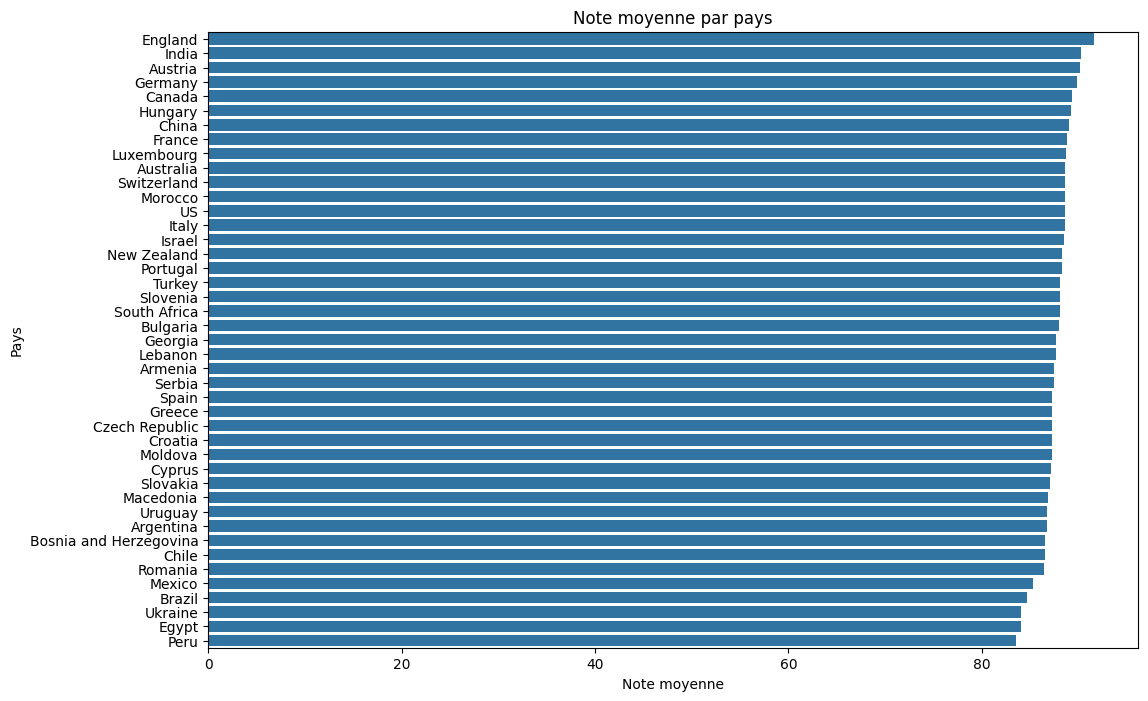

In [80]:

plt.figure(figsize=(12, 8))
sns.barplot(x='points', y='country', data=country_group.sort_values('points', ascending=False))
plt.title('Note moyenne par pays')
plt.xlabel('Note moyenne')
plt.ylabel('Pays')
plt.show()

- Les pays en haut du graphique seraient ceux dont les vins ont reçu les notes moyennes les plus élevées. Cela pourrait indiquer une qualité de vin globalement supérieure ou une perception favorable par les critiques.
- La longueur des barres reflèterait la note moyenne de chaque pays. Des barres plus longues indiquent des notes moyennes plus élevées. Cela donne un aperçu visuel rapide de la façon dont les notes varient d'un pays à l'autre.

3.4 Corrélation entre le prix et les notes :

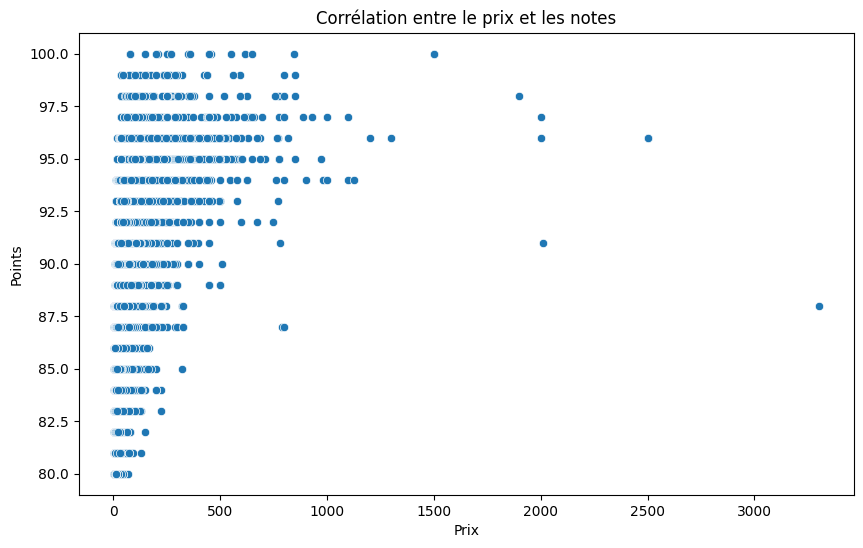

In [82]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='points', data=data_cleaned)
plt.title('Corrélation entre le prix et les notes')
plt.xlabel('Prix')
plt.ylabel('Points')
plt.show()

-Chaque point sur le graphique représente un vin, avec son prix sur l'axe des x et sa note sur l'axe des y. La dispersion des points donne une indication visuelle de la relation entre ces deux variables.

-Si les points tendent à monter vers la droite, cela indiquerait une corrélation positive, suggérant que des prix plus élevés sont associés à des notes plus élevées.
Une absence de tendance claire, comme dans notre cas, suggère qu'il n'y a pas de relation forte ou cohérente entre le prix et les notes.

3.5 Provinces produisant le plus de vin :

In [83]:

provinces_count = data_cleaned['province'].value_counts()

# Afficher les 10 premières provinces
print(provinces_count.head(10))


California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
Burgundy             3980
Northern Spain       3851
Piedmont             3729
Mendoza Province     3264
Veneto               2716
Name: province, dtype: int64


Californie (36247 critiques) :

Avec le plus grand nombre de critiques, la Californie se distingue comme une région viticole majeure. Cela reflète probablement sa grande production de vin et sa popularité sur le marché mondial.

Washington (8639 critiques) :

Washington, bien qu'ayant nettement moins de critiques que la Californie, est une région viticole importante aux États-Unis, connue pour ses vins de qualité.

Bordeaux (5941 critiques) et Toscane (5897 critiques) :

Ces deux régions sont parmi les plus célèbres en Europe, Bordeaux en France et Toscane en Italie. Leur présence souligne leur importance historique et leur réputation dans la production de vins de qualité supérieure.

3.6 Notes moyennes par provinces/pays :

In [84]:
# Note moyenne par pays
country_avg_points = data_cleaned.groupby('country')['points'].mean().sort_values(ascending=False)

# Note moyenne par province
province_avg_points = data_cleaned.groupby('province')['points'].mean().sort_values(ascending=False)

# Afficher les résultats
print(country_avg_points.head(10))
print(province_avg_points.head(10))


country
England       91.581081
India         90.222222
Austria       90.101345
Germany       89.851732
Canada        89.369650
Hungary       89.191781
China         89.000000
France        88.845109
Luxembourg    88.666667
Australia     88.580507
Name: points, dtype: float64
province
Südburgenland    94.000000
Madeira          93.230769
Mittelrhein      92.000000
Puente Alto      91.733333
Wachau           91.620397
England          91.581081
Santa Cruz       91.500000
Kamptal          91.454768
Traisental       91.255814
Eisenberg        91.187500
Name: points, dtype: float64


Les résultats montrent que l'Angleterre, l'Inde et l'Autriche sont les pays avec les notes moyennes les plus élevées, ce qui suggère une qualité exceptionnelle de leurs vins. Les provinces de Südburgenland, Madeira et Mittelrhein se distinguent par les notes moyennes les plus élevées, reflétant potentiellement des terroirs uniques ou des méthodes de vinification de haute qualité. Ces classements mettent en évidence des régions moins connues, démontrant leur capacité à produire des vins de qualité supérieure.

  3.7 Provinces/domaines produisant les vins les plus chers :

In [85]:
# Prix moyen par province
province_avg_price = data_cleaned.groupby('province')['price'].mean().sort_values(ascending=False)

# Prix moyen par domaine
winery_avg_price = data_cleaned.groupby('winery')['price'].mean().sort_values(ascending=False)

# Afficher les résultats
print(province_avg_price.head(10))
print(winery_avg_price.head(10))


province
Colares              262.500000
Vânju Mare           166.000000
Switzerland          160.000000
Madeira              102.902892
Moscatel do Douro     83.819656
Buin                  83.625000
Puente Alto           81.224586
Rheingau              78.865338
Santa Cruz            77.500000
Champagne             73.174100
Name: price, dtype: float64
winery
Château Pétrus                   1511.789599
Château les Ormes Sorbet         1123.579198
Domaine du Comte Liger-Belair     681.315998
Masseto                           587.500000
Armand de Brignac                 468.750000
Yao Ming                          390.833333
Barons de Rothschild              390.000000
Salon                             380.600000
Verité                            373.333333
Schloss Reinhartshausen           353.333333
Name: price, dtype: float64


Les résultats indiquent que Colares et Vânju Mare sont les provinces avec les prix moyens les plus élevés, suggérant des vins exclusifs ou de niche. En ce qui concerne les domaines, Château Pétrus et Château les Ormes Sorbet se distinguent par leurs prix moyens élevés, reflétant probablement une réputation exceptionnelle et une qualité perçue très élevée dans le monde du vin. Ces classements illustrent le prestige et la valeur de marché associés à certaines régions et domaines viticoles.

3.8 Relation entre la longueur de la description et les notes :

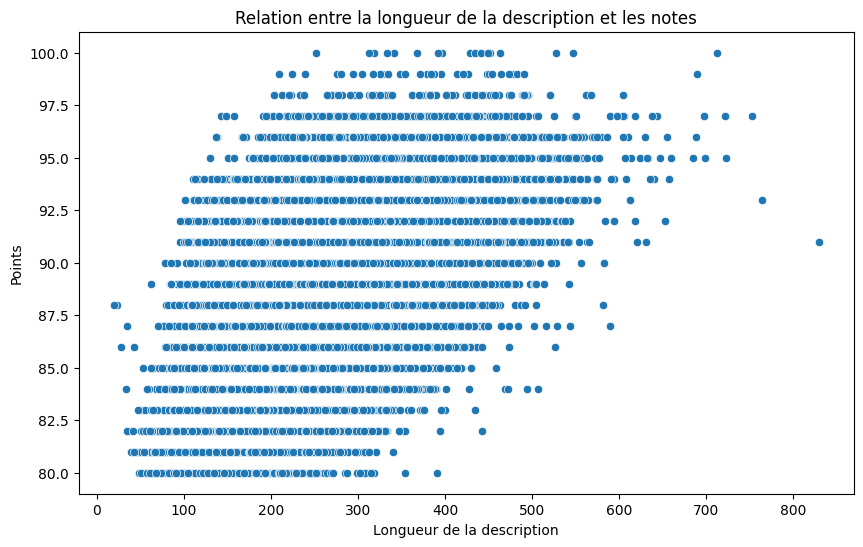

In [89]:
# Calculer la longueur de la description
df['description_length'] = data_cleaned['description'].apply(len)

# Analyser la relation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='description_length', y='points', data=data_cleaned)
plt.title('Relation entre la longueur de la description et les notes')
plt.xlabel('Longueur de la description')
plt.ylabel('Points')
plt.show()


 I
 l n'y a pas de tendance claire ou de corrélation évidente entre la longueur de la description et les notes des vins. Les points semblent être répartis de manière aléatoire sur le graphique.